In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # linear algebra
 # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tinovation-grades-2022/sample_submission.csv
/kaggle/input/tinovation-grades-2022/student_info.txt
/kaggle/input/tinovation-grades-2022/train.csv
/kaggle/input/tinovation-grades-2022/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/tinovation-grades-2022/train.csv",index_col=[0])
train_data['G4'] = (train_data['G1']+train_data['G2'])/2
test_data = pd.read_csv("/kaggle/input/tinovation-grades-2022/test.csv",index_col=[0])
test_data['Id'] = list(range(0, 75))
test_data['G4'] = (test_data['G1']+test_data['G2'])/2
print(train_data)


    sex  age address guardian  studytime  failures schoolsup famsup paid  \
0     F   18       U   mother          2         0       yes     no   no   
1     F   17       U   father          2         0        no    yes   no   
2     F   15       U   mother          2         3       yes     no  yes   
3     F   15       U   mother          3         0        no    yes  yes   
4     F   16       U   father          2         0        no    yes  yes   
..   ..  ...     ...      ...        ...       ...       ...    ...  ...   
390   M   20       U    other          2         2        no    yes  yes   
391   M   17       U   mother          1         0        no     no   no   
392   M   21       R    other          1         3        no     no   no   
393   M   18       R   mother          1         0        no     no   no   
394   M   19       U   father          1         0        no     no   no   

    activities  ... freetime goout Dalc  Walc  health  absences  G1  G2  G3  \
0       

<AxesSubplot:xlabel='G4', ylabel='G3'>

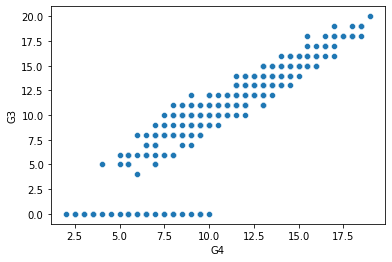

In [3]:
sns.scatterplot(data = train_data, x = "G4", y = "G3")

In [4]:
train = train_data.loc[0:,['G4',"G3"]]
train = train.dropna(axis = 0);
train.shape
test = test_data.loc[0:,["Id","G4"]]
test = test.fillna(np.median(test.dropna()))
test.shape

(75, 2)

In [5]:
X = train.loc[:,["G4"]]
y = np.array(train.loc[:,['G3']]).ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3,random_state=0)
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score   

model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.779589395999129

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


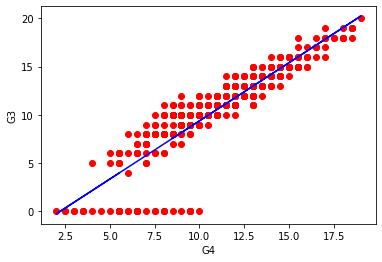

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='blue')
plt.xlabel('G4')
plt.ylabel('G3')
plt.show()

In [8]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly = PolynomialFeatures(degree = 6, include_bias = False) #experiment with the degree!
# poly_features = poly.fit_transform(X_train.reshape(-1,1))

# poly_reg_model = LinearRegression()
# poly_reg_model.fit(poly_features, y_train)

# polypredictions = poly_reg_model.predict(poly_features)

# poly_features_test = poly.fit_transform(X_test.reshape(-1,1))

# poly_reg_model.score(poly_features_test,y_test)

In [9]:
xt = test.loc[:,["G4"]]
#print(xt)
predictions = model.predict(xt).ravel();
#print(predictions)
output = pd.DataFrame({'Id': list(range(0,75)), 'G3': predictions})
output.to_csv('submission.csv', index=False)
print(output)


    Id         G3
0    0   4.556406
1    1  17.815262
2    2  12.993860
3    3   7.569782
4    4   9.980483
..  ..        ...
70  70  13.596535
71  71  11.788509
72  72   8.172458
73  73   9.980483
74  74   8.172458

[75 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [10]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# xt = test.loc[:,["G2"]]
# poly_features = poly.fit_transform(xt)

# polypredictions = poly_reg_model.predict(poly_features).ravel()
# output = pd.DataFrame({'Id': list(range(0,75)), 'G3': polypredictions})
# output.to_csv('submission.csv', index=False)
# print(output)

